<a href="https://colab.research.google.com/github/neethj/deeplearning-for-audio/blob/main/preprocessing_audio_data_for_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "blues.00000.wav"

In [3]:
signal, sr = librosa.load(file, sr=22050)

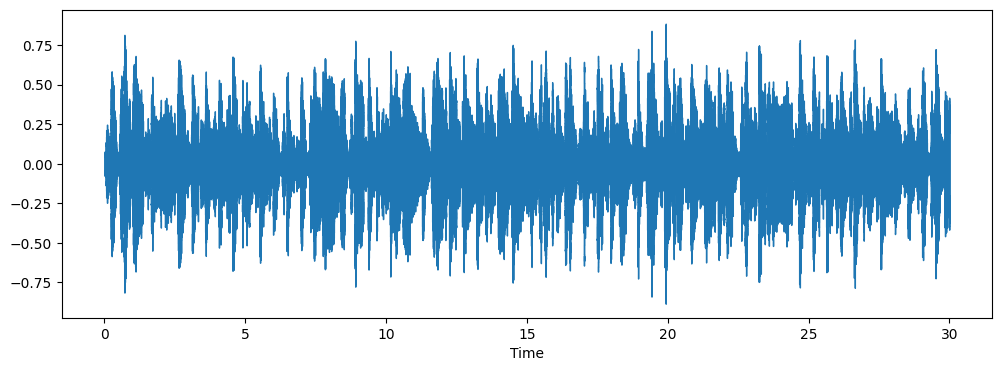

In [10]:
# WAVEFORM
# display waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)

In [12]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)


In [13]:
# calculate abs values on complex numbers to get magnitude
magnitude = np.abs(fft)


In [22]:
# create frequency variable
frequency = np.linspace(0, sr, len(magnitude))


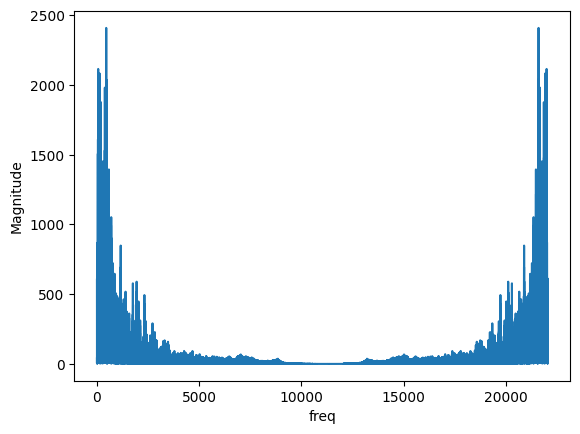

In [23]:
plt.plot(frequency, magnitude)
plt.xlabel("freq")
plt.ylabel("Magnitude")
plt.show()

Above image shows that the magnitude is at the both left and right ends, this image is also symmetric in nature. so we can split this image and focus on the ends only

In [24]:
# take half of the spectrum and frequency
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]


Text(0.5, 1.0, 'Power spectrum')

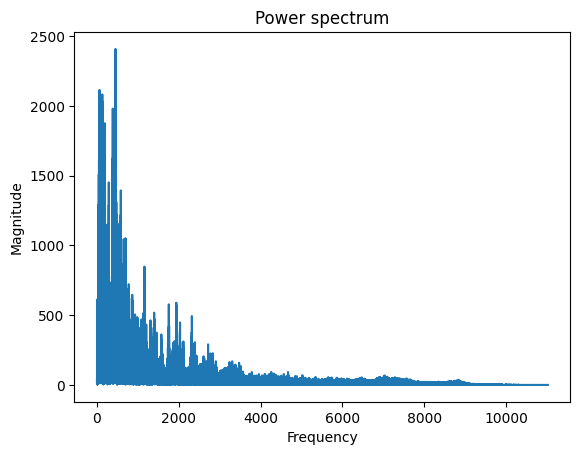

In [27]:
# plot spectrum

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")



In [28]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples


In [30]:
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr


In [31]:
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))


STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


In [32]:
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)


In [33]:
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)


Text(0.5, 1.0, 'Spectrogram')

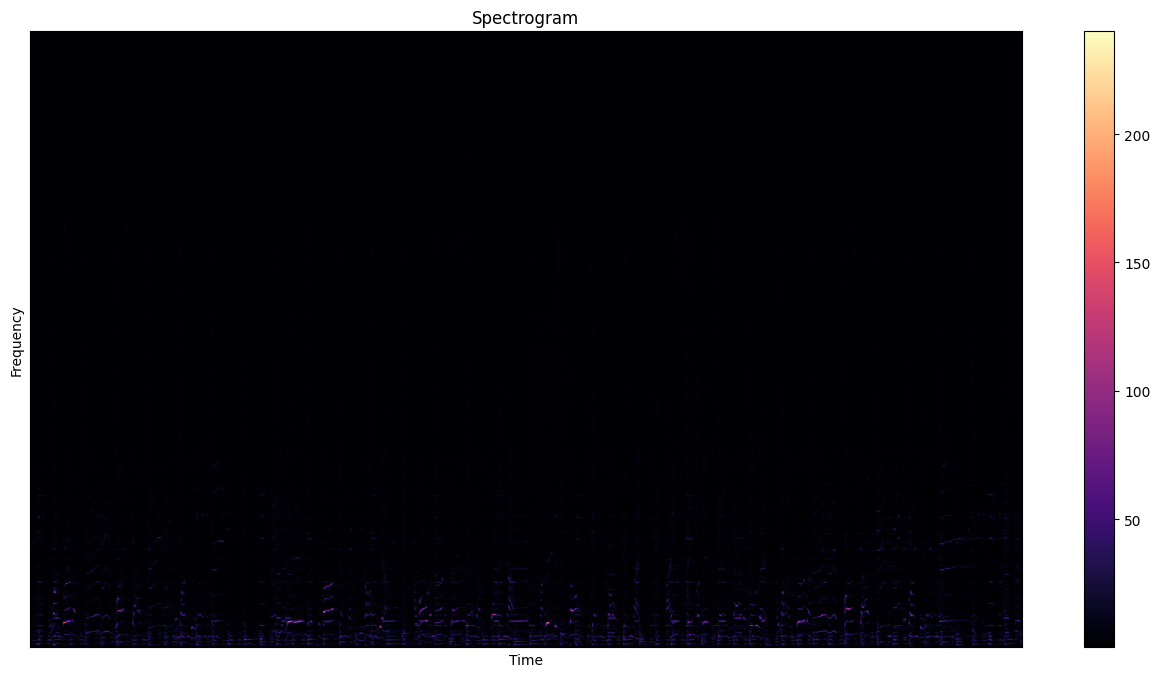

In [35]:
# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")


In [36]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)


Text(0.5, 1.0, 'Spectrogram (dB)')

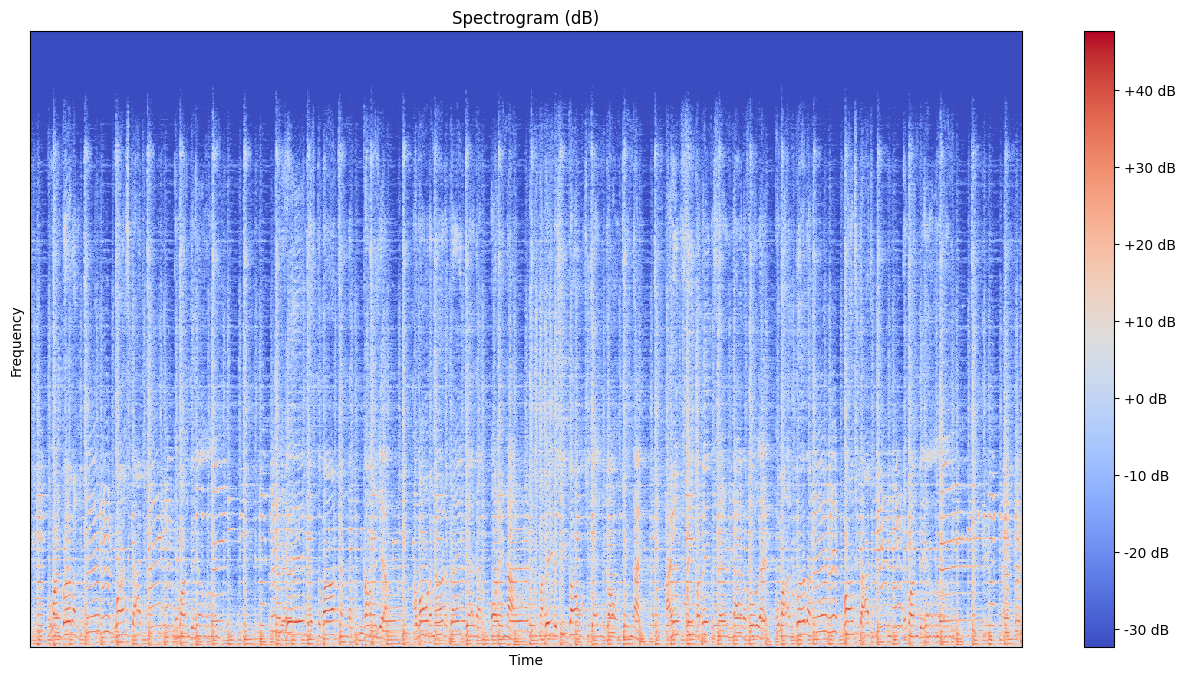

In [37]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")


In [42]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


Text(0.5, 1.0, 'MFCCs')

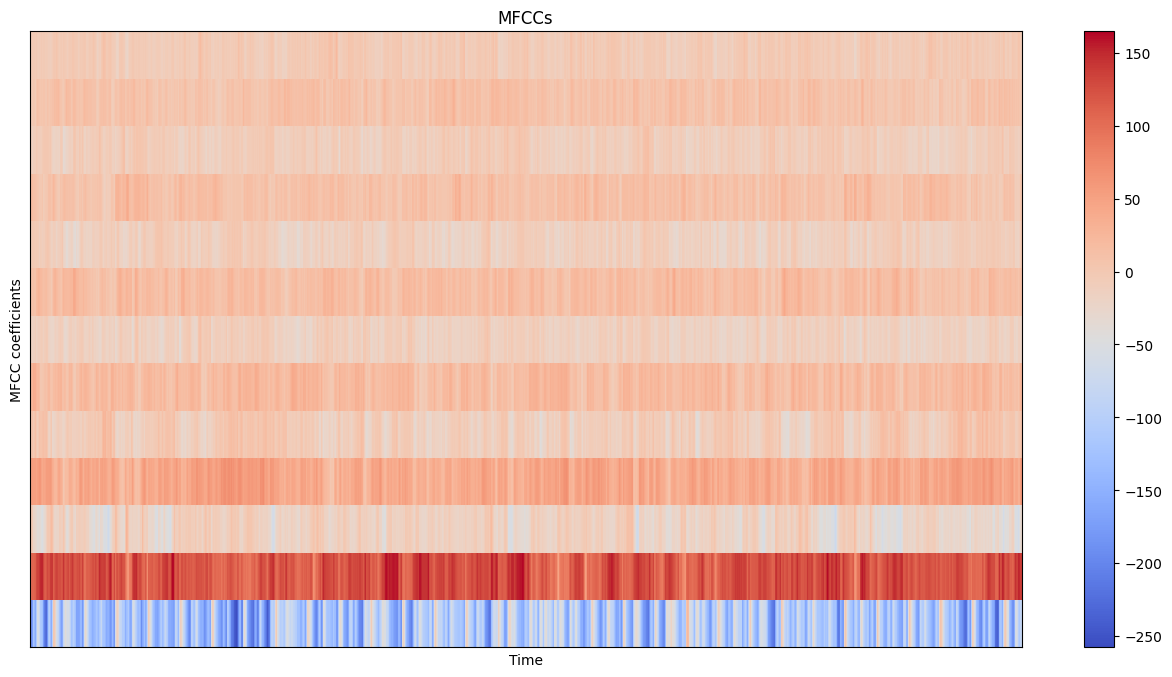

In [43]:
# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
